In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("C:\\Users\\vasud\\Downloads\\Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [4]:
df.dropna( axis=0,inplace=True)

In [6]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

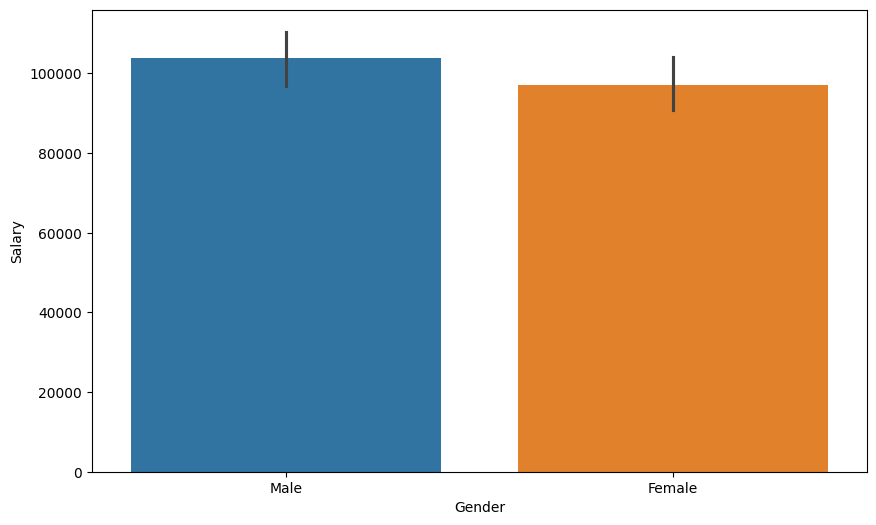

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Gender'],
            y=df['Salary'],
            hue=df["Gender"])
plt.show()

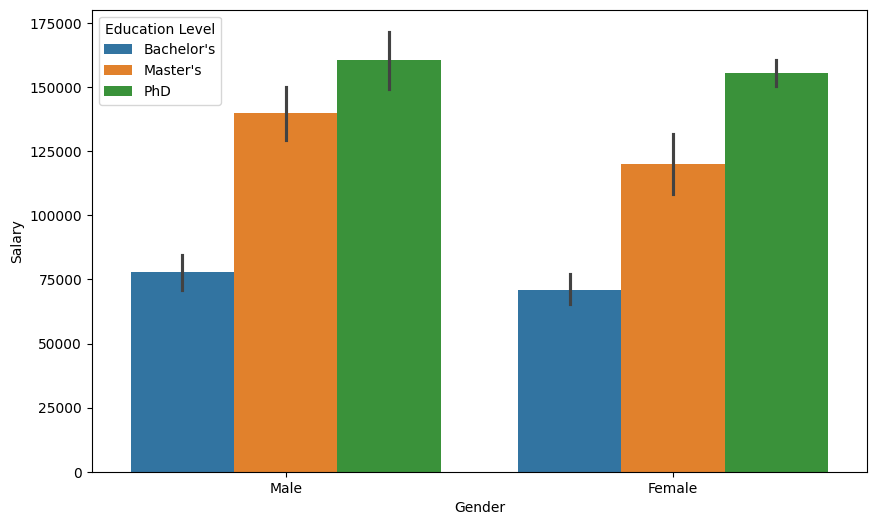

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Gender'],
            y=df['Salary'],
            hue=df["Education Level"])
plt.show()

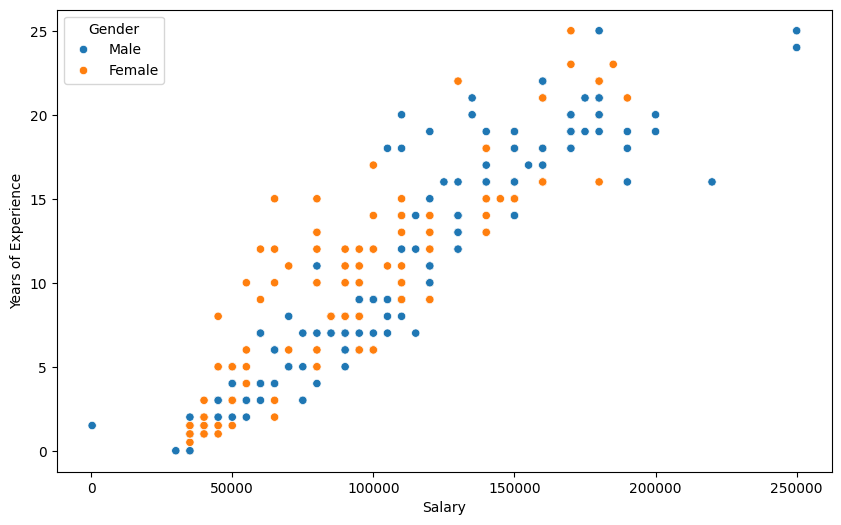

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'],
                     y=df['Years of Experience'],
                     hue=df['Gender'])
plt.show()

In [10]:
#feature encodeing 
df.select_dtypes(include="object").columns

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
cat_col=["Gender",'Education Level','Job Title']
for i in df[cat_col]:
    df[i]=lab_enc.fit_transform(df[i])

In [13]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [16]:
x=df.drop('Salary',axis=1)
y=df["Salary"]

In [17]:
x

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,159,5.0
1,28.0,0,1,17,3.0
2,45.0,1,2,130,15.0
3,36.0,0,0,101,7.0
4,52.0,1,1,22,20.0
...,...,...,...,...,...
370,35.0,0,0,131,8.0
371,43.0,1,1,30,19.0
372,29.0,0,0,70,2.0
373,34.0,1,0,137,7.0


In [18]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [20]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)   


In [21]:
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()
Linreg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred=Linreg.predict(x_test)
y_pred[:10]

array([169218.22279526, 126868.13175783,  48911.15437564, 132785.37796512,
       138292.67607403, 163528.64457645,  44258.16156232,  45887.72627355,
        63752.76831409, 157817.13180799])

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

89.39711575378378